In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [162]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [163]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [164]:
gdp_df = gdp_df[:-2]

In [165]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [166]:
#5. Drop the 'Value Footnotes' column, rename columns. 
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df = gdp_df.rename(columns ={'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [167]:
#6. How many rows and columns does gdp_df have?
gdp_df.shape

(6868, 3)

gdp has 6,868 rows and 3 columns

In [168]:
#What are the data types of its columns?
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [169]:
#Change data types of columns
gdp_df = gdp_df.astype({"Country":'string', "Year": int})

gdp_df.dtypes

Country            string
Year                int32
GDP_Per_Capita    float64
dtype: object

In [170]:
#7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
gdp_df['Year'].describe()

count    6868.000000
mean     2004.829354
std         8.573176
min      1990.000000
25%      1998.000000
50%      2005.000000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

The years represented in the dataset are 1990 - 2019. 

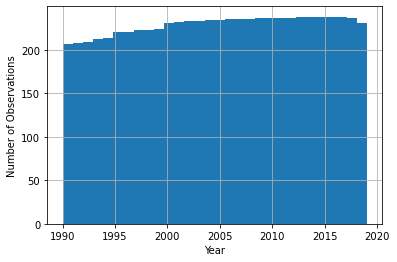

In [171]:
#Number of observations per year

gdp_df['Year'].plot(kind = 'hist', bins = 30, grid = True)
plt.xlabel('Year')
plt.ylabel('Number of Observations');

The histogram shows the number of observations has increased since 1990. 

In [172]:
#8. How many countries are represented in the dataset?
gdp_df['Country'].nunique()

238

In [173]:
#Which countries are least represented in the dataset?
gdp_df.groupby(['Country'])['Country'].count().sort_values()

Country
Djibouti                      7
Turks and Caicos Islands      9
Sint Maarten (Dutch part)    10
Cayman Islands               13
Nauru                        16
                             ..
Honduras                     30
Hong Kong SAR, China         30
IBRD only                    30
Greece                       30
Zimbabwe                     30
Name: Country, Length: 238, dtype: int64

There are 238 countries represented in the dataset. The countries least represented are Djibouti, Turks and Caicos Islands. They may have few observations because of lack of reporting by the countries.

In [174]:
gdp_df['Country'].value_counts()

Pacific island small states    30
Kyrgyz Republic                30
Indonesia                      30
Comoros                        30
Ecuador                        30
                               ..
Nauru                          16
Cayman Islands                 13
Sint Maarten (Dutch part)      10
Turks and Caicos Islands        9
Djibouti                        7
Name: Country, Length: 238, dtype: Int64

9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [175]:
#9. Create new datafrae gdp_2014 by subsetting gdp_df to the year 2014. 
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [17]:
#10. Use .describe() to find the summary statistics for GDP per capita in 2014
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

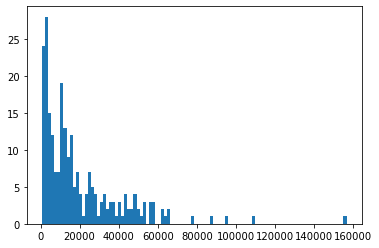

In [18]:
#11. Create a histogram of GDP Per Capita numbers for 2014.
plt.hist(gdp_2014['GDP_Per_Capita'], bins = 100);

The distribution is skewed right. 

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [194]:
#12. Find the top 5 and bottom 5 countries by GDP per capita in 2014.
#Bottom 5 countries by GDP_Per_Capita
gdp_2014.sort_values('GDP_Per_Capita').reset_index()[['Country', 'GDP_Per_Capita']][:5]

,Country,GDP_Per_Capita
0,Central African Republic,822.610458
1,Burundi,886.235777
2,Malawi,1027.208496
3,Dem. Rep. Congo,1029.790785
4,Niger,1127.615541


In [196]:
#Top 5 countries by GDP_Per_Capita
gdp_2014.sort_values('GDP_Per_Capita', ascending=False).reset_index()[['Country', 'GDP_Per_Capita']][:5]

,Country,GDP_Per_Capita
0,"Macao SAR, China",156514.133850
1,Luxembourg,108760.916030
2,Qatar,95578.416973
3,Singapore,87808.663157
4,Bermuda,77361.104881


In [199]:
#13 Pivot gdp_df for 1990-2017

#Keep only years 1990-2017
gdp_90_17 = gdp_df[(gdp_df['Year'] >= 1990) & (gdp_df['Year'] <=2017)]


#Pivot: each row is 'Country', each column corresponds to a year, values in the table give GDP_Per_Capita.
gdp_pivoted = gdp_90_17.pivot(index = 'Country', columns = 'Year', values = 'GDP_Per_Capita')


#Drop missing rows
gdp_pivoted = gdp_pivoted.dropna()
gdp_pivoted.shape

(207, 28)

In [200]:
#14. Create new column for Percent Change in GDP_Per_Capita 1990-2017.
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]
gdp_pivoted.head(2)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,34.197756


In [202]:
#15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?
len(gdp_pivoted[gdp_pivoted['Percent_Change'] < 0])

17

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
    Bonus: Put both line charts on the same plot.

In [206]:
#Country with highest % change in GDP_Per_Capita
top_chg= gdp_pivoted.sort_values('Percent_Change', ascending = False).reset_index()['Country'][0]
top_chg

'Equatorial Guinea'

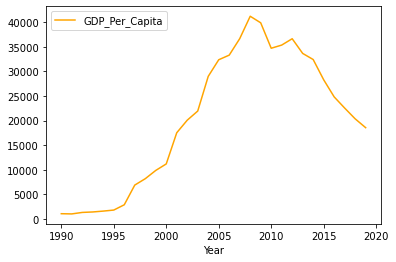

In [224]:
#Create line plot for this country
gdp_df[gdp_df['Country'] == top_chg].plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line', color = 'orange');

In [208]:
#Country with second highest % change in GDP_Per_Capita
top_chg_2 = gdp_pivoted.sort_values('Percent_Change', ascending = False).reset_index()['Country'][1]
top_chg_2

'China'

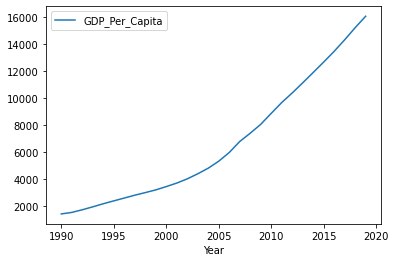

In [209]:
#Create line plot for this country
gdp_df[gdp_df['Country'] == top_chg_2].plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line', );

In [216]:
#Put both line charts on the same plot
#Subset df
highest2 = gdp_pivoted.sort_values('Percent_Change', ascending = False).reset_index()['Country'][:2]
gdp_df_ss = gdp_df[gdp_df['Country'].isin(highest2)]

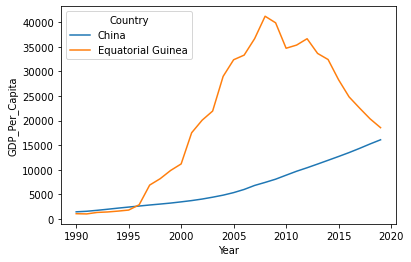

In [222]:
sns.lineplot(data = gdp_df_ss, x = 'Year', y = 'GDP_Per_Capita', hue = 'Country');

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset

In [226]:
#17. Read in continents.csv

continents = pd.read_csv('../data/continents.csv')
continents.head(2)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania


In [229]:
#18. Merge gdp_df and continents. Keep only the countries that appear in both data frames.
gdp_df = pd.merge(gdp_df, continents, how='inner')
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia


In [228]:
#19. Determine the number of countries per continent. 
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

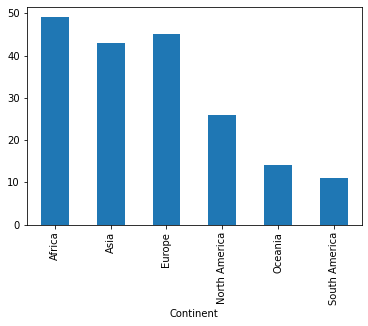

In [230]:
#Create bar chart for countries per continent. 
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar',);

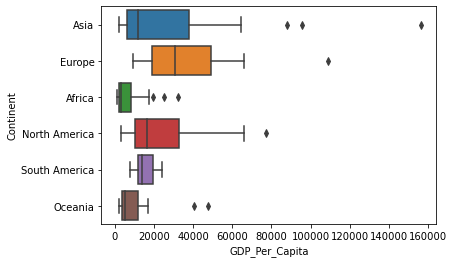

In [232]:
#20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
sns.boxplot(data=gdp_2014, x = 'GDP_Per_Capita', y = 'Continent');

Asia has a lot of variability in GDP_Per_Capita and has a skewed right distribution with large outliers. 

Q21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy.

In [235]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4553490.csv', skiprows = 4,  engine='python')
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.44400,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.60399,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN


Q22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy


In [236]:
#Drop columns
life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

#Convert to long format
life_expectancy = pd.melt(life_expectancy, id_vars = ['Country Name'])

#Rename columns
life_expectancy = life_expectancy.rename(columns={'Country Name':'Country', 'variable':'Year', 'value':'Life Expectancy'})

life_expectancy.head(2)

,Country,Year,Life Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053



Q23. What was the first country with a life expectancy to exceed 80?


In [237]:
lf_exp80 = life_expectancy[life_expectancy['Life Expectancy'] > 80].sort_values('Year').reset_index()
lf_exp80['Country'][0]

'Japan'

In [238]:
lf_exp80 = life_expectancy[life_expectancy['Life Expectancy'] > 80]
lf_exp80[lf_exp80.Year == lf_exp80.Year.min()]

,Country,Year,Life Expectancy
9695,Japan,1996,80.200244


Q24. Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [239]:
#Check data types
life_expectancy.dtypes

Country             object
Year                object
Life Expectancy    float64
dtype: object

In [240]:
#Drop rows with na
life_expectancy = life_expectancy.dropna()

#Change data types
life_expectancy = life_expectancy.astype({'Country':'string', 'Year':'int'})

#Check data types
life_expectancy.dtypes

Country             string
Year                 int32
Life Expectancy    float64
dtype: object

In [242]:
#Merge gdp_df and life_expectancy on Country and Year
gdp_le = pd.merge(gdp_df, life_expectancy, on = ['Country', 'Year'])

#Check first 5 rows
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486


In [243]:
#Check last 5 rows
gdp_le.tail(5)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
4917,Zimbabwe,1994,3263.934978,Africa,52.044
4918,Zimbabwe,1993,3033.504852,Africa,53.653
4919,Zimbabwe,1992,3054.889178,Africa,55.243
4920,Zimbabwe,1991,3426.598094,Africa,56.749
4921,Zimbabwe,1990,3324.348171,Africa,58.100


In [244]:
#Check for missing values
print(gdp_le.isnull().values.any())
print(gdp_le.isnull().sum().sum())

False
0



Q25. Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?


In [246]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019]

#How many countries have a life expectancy of at least 80 in 2019?
gdp_le_2019[gdp_le_2019['Life Expectancy'] >= 80]['Country'].nunique()

33

Q26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [247]:
#Countries with top 3 GDP per Capita
top3 = gdp_le_2019.sort_values('GDP_Per_Capita', ascending = False).reset_index()[0:3]
top3

,index,Country,Year,GDP_Per_Capita,Continent,Life Expectancy
0,2628,"Macao SAR, China",2019,123965.286432,Asia,84.244000
1,2598,Luxembourg,2019,114304.044210,Europe,82.639024
2,3916,Singapore,2019,97341.468645,Asia,83.595122


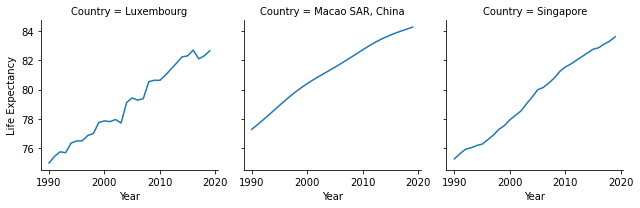

In [248]:
#Subset top3 countries
top3ss = gdp_le[gdp_le['Country'].isin(top3['Country'])]

#Create FacetGrid
g = sns.FacetGrid(top3ss, col = 'Country')
g.map(sns.lineplot, 'Year', 'Life Expectancy');

Q27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

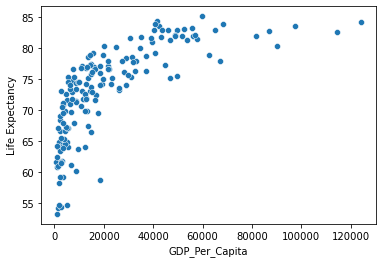

In [249]:
sns.scatterplot(data = gdp_le_2019, x = 'GDP_Per_Capita', y = 'Life Expectancy');

The plot shows countries with higher GDP_Per_Capitas have higher Life Expectancies. 

Q28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [250]:
gdp_le_2019['Life Expectancy'].corr(gdp_le_2019['GDP_Per_Capita'])

0.7090182746006474

The correlation coefficient indicates a strong positive linear relationship between GDP Per Capita and Life Expectancy. 


Q29. Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.


In [251]:
gdp_le_2019['logGDP'] = np.log10(gdp_le_2019['GDP_Per_Capita'])

<ipython-input-251-5affa406bfd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['logGDP'] = np.log10(gdp_le_2019['GDP_Per_Capita'])


In [252]:
gdp_le_2019['Life Expectancy'].corr(gdp_le_2019['logGDP'])

0.848497584800642

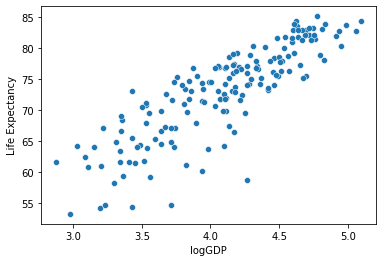

In [253]:
sns.scatterplot(data = gdp_le_2019, x = 'logGDP', y = 'Life Expectancy');

The correlation is stronger for the relationship between log GDP_Per_Capita and Life Expectancy. The scatterplot also shows a stronger positive linear relationship between the two variables. 

## Solo Exploration

#### 'Employed population by status in employment, industry and sex'

In [295]:
emp = pd.read_csv('../data/UNdata_Export_20220925_002155572.csv')
emp.head()

,Country or Area,Year,Area,Sex,Status in employment,Industry,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Åland Islands,2000,Total,Both Sexes,Total,"Agriculture, hunting and forestry (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2009.0,703.0,1
1,Åland Islands,2000,Total,Both Sexes,Total,Fishing (ISIC Rev.3/3.1: Section B),Census - de jure - complete tabulation,"Final figure, complete",2009.0,104.0,1
2,Åland Islands,2000,Total,Both Sexes,Total,Mining and quarrying (ISIC Rev.3/3.1: Section C),Census - de jure - complete tabulation,"Final figure, complete",2009.0,2.0,1
3,Åland Islands,2000,Total,Both Sexes,Total,Manufacturing (ISIC Rev.3/3.1: Section D),Census - de jure - complete tabulation,"Final figure, complete",2009.0,1168.0,1
4,Åland Islands,2000,Total,Both Sexes,Total,"Electricity, gas and water supply (ISIC Rev.3/...",Census - de jure - complete tabulation,"Final figure, complete",2009.0,117.0,1


In [296]:
#Drop columns
emp.drop(['Record Type', 'Reliability', 'Value Footnotes', 'Source Year'], axis=1, inplace = True)

#Remove text in parentheses in 'Indrustry'
emp['Industry_s'] = emp['Industry'].str.split('(').str[0]

#Drop column 'Industry'
emp.drop('Industry', axis = 1, inplace = True)

#Rename Industry and Country
emp = emp.rename(columns = {'Industry_s':'Industry', 'Country or Area':'Country'})


emp.head(2)

,Country,Year,Area,Sex,Status in employment,Value,Industry
0,Åland Islands,2000,Total,Both Sexes,Total,703.0,"Agriculture, hunting and forestry"
1,Åland Islands,2000,Total,Both Sexes,Total,104.0,Fishing


In [297]:
#Drop rows with missing values
emp = emp.dropna()

In [298]:
#Delete rows with 'Unknown' or 'Activities not Described' from Industry
emp = emp[emp['Industry'].str.contains('Activties | not |Unknown')==False]

In [299]:
mydict = {'Electricity':'Utility Services', 'Fishing': 'Agriculture',
          'trade' : 'Trade', 'Agriculture':'Agriculture', 
          'Wholesale':'Trade', 'Construction':'Construction',
          'transport':'Transportation','Education':'Education',
          'Mining':'Mining', 'Service':'Service',
          'estate':'Real Estate', 'Finance':'Finance', 'Financial':'Finance' ,
          'restaurants':'Service', 'administration':'Public Admin',
          'social':'Social Work', 'Activities':'Other', 
          'Extraterritorial':'Other', 'Manufacturing':'Manufacturing', 
          'private':'Other', 'supply':'Utility Services',
          'service':'Service', 'Information':'Information', 'Total':'Other', 
          'scientific':'Technology', 'health': 'Health', 'Arts':'Arts', 'Commerce':'Trade'}

In [300]:
#Uncomment to check mydict
#count = 0
#for key,value in mydict.items():
#    count+=1
#    print(str(count) + '- ' + key + ':' + value)
    

In [301]:
#Obtain the Industry column as a list
ind_list = emp['Industry'].values.tolist()


#Make a for loop to replace long names in Industry column based on key words using dictionary

new_ind_list = []      #empty list

for elem in ind_list: # loop through each element in ind_list 
    for key, value in mydict.items(): # loop through each dict key/value pair in the dictionary 
        if key.lower() in elem.lower():  #check if key in dict is inside the elem string from ind_list
            new_ind_list.append(value)   # if it is present add the dictionary value to new list
            break
        
  

In [302]:
#Check for equal lengths 
print('new_ind_list length: '  + str(len(new_ind_list)))
print('Industry length: ' + str(len(emp['Industry'])))

#Check for unique counts
print('Industry unique values count: ' + str(emp['Industry'].nunique()))
print('new_ind_list unique values count: '+ str(len(set(new_ind_list))))

#Print unique values for new_ind_list
print(set(new_ind_list))

new_ind_list length: 55945
Industry length: 55945
Industry unique values count: 46
new_ind_list unique values count: 16
{'Other', 'Education', 'Construction', 'Manufacturing', 'Transportation', 'Arts', 'Utility Services', 'Public Admin', 'Service', 'Information', 'Trade', 'Real Estate', 'Mining', 'Agriculture', 'Finance', 'Social Work'}


In [303]:
#Add new_ind_list as a column to emp
emp['new_ind'] = new_ind_list

emp.head(2)

#Drop Industry column
emp = emp.drop(['Industry'], axis = 1)

#Rename new_ind to Industry
emp = emp.rename(columns = {'new_ind': 'Industry'})

#Check rows
emp.head(2)

,Country,Year,Area,Sex,Status in employment,Value,Industry
0,Åland Islands,2000,Total,Both Sexes,Total,703.0,Agriculture
1,Åland Islands,2000,Total,Both Sexes,Total,104.0,Agriculture


In [308]:
emp.groupby('Sex')['Industry'].value_counts()

Sex         Industry        
Both Sexes  Other               3046
            Service             2844
            Agriculture         1378
            Construction        1034
            Manufacturing       1029
            Trade               1012
            Transportation      1012
            Mining              1006
            Utility Services    1005
            Finance              909
            Real Estate          904
            Education            901
            Social Work          895
            Public Admin         889
            Information          466
            Arts                 453
Female      Other               3021
            Service             2809
            Agriculture         1370
            Construction        1024
            Manufacturing       1019
            Trade               1003
            Transportation      1002
            Mining               994
            Utility Services     990
            Finance              900
         

In [108]:
emp.dtypes

Country                  object
Year                     object
Area                     object
Sex                      object
Status in employment     object
Value                   float64
Industry_G               object
dtype: object

In [310]:
emp['Status in employment'].unique()

array(['Total', 'Own account worker', 'Employee', 'Employer',
       'Contributing family members', "Member of producers' cooperative",
       'Unknown', 'Other'], dtype=object)

In [311]:
emp['Value'].describe()

count    5.594500e+04
mean     2.428295e+05
std      1.798397e+06
min      0.000000e+00
25%      8.100000e+01
50%      2.206000e+03
75%      3.627600e+04
max      1.096704e+08
Name: Value, dtype: float64

In [312]:
emp['Value'].max()

109670399.0

#### Create Pivot Table

In [328]:
emp2 = emp.drop(['Year', 'Area', 'Sex', 'Status in employment'], axis = 1)

#Make pivot table of emp
emp_pivoted = emp2.pivot_table(index = 'Country', columns = 'Industry', values = 'Value', aggfunc='sum')
emp_pivoted = emp_pivoted.dropna()

In [329]:
#Make new column 'Sum' for the sum of values of all Industry catergories
emp_pivoted['Sum'] = emp_pivoted.aggregate(func = np.sum, axis=1)

emp_pivoted.head(3)

Industry,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Utility Services,Sum
Country,,,,,,,,,,,,,,,,,
Albania,706980.0,29428.0,226752.0,203304.0,36864.0,41344.0,238504.0,27188.0,2784020.0,212036.0,1108.0,221352.0,113624.0,351264.0,99196.0,27120.0,5320084.0
Armenia,1560992.0,56780.0,272192.0,378968.0,59320.0,74208.0,316012.0,36056.0,4316448.0,324724.0,11740.0,177848.0,169316.0,409336.0,148568.0,83184.0,8395692.0
Australia,4394420.0,736229.0,13398727.0,13296569.0,5982324.0,1339981.0,13306238.0,2485864.0,164816012.0,12972526.0,11792869.0,20304782.0,19386503.0,23369126.0,9339563.0,1398208.0,318319941.0


In [330]:
#Create new column for % of Population in Agriculture
emp_pivoted['AgPercent'] = 100*emp_pivoted['Agriculture']/emp_pivoted['Sum']

In [331]:
#Statistical summary for % of population in agriculture
emp_pivoted['AgPercent'].describe()

count    67.000000
mean      8.153800
std       9.394327
min       0.079182
25%       1.516320
50%       2.941023
75%      13.625627
max      37.187679
Name: AgPercent, dtype: float64

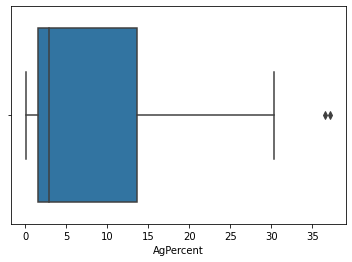

In [332]:
#Boxplot for % of population in agriculture
sns.boxplot(data=emp_pivoted, x = 'AgPercent');

In [333]:
#Top 4 Countries with highest % of population in agriculutre industry
Ag_heavy = emp_pivoted.sort_values('AgPercent', ascending = False).reset_index()[0:4]
Ag_heavy

Industry,Country,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Utility Services,Sum,AgPercent
0,Cambodia,35014560.0,85012.0,747008.0,776584.0,73312.0,27768.0,2321256.0,42932.0,47356084.0,1635468.0,13848.0,1224248.0,233924.0,3485600.0,1076040.0,42704.0,94156348.0,37.187679
1,Lao People's Democratic Republic,10003184.0,22888.0,412408.0,317064.0,47844.0,29896.0,492240.0,55464.0,13990504.0,881840.0,1392.0,158604.0,69472.0,734156.0,113028.0,37160.0,27367144.0,36.551801
2,Kenya,47473562.0,380192.0,2122778.0,1593398.0,624358.0,328040.0,1059780.0,347126.0,79171040.0,704360.0,222942.0,16273718.0,741516.0,2775730.0,2050882.0,374534.0,156243956.0,30.384255
3,Tajikistan,5658580.0,47712.0,583220.0,720472.0,37356.0,52556.0,370640.0,97204.0,9661868.0,337056.0,3688.0,314436.0,329636.0,640700.0,216208.0,60156.0,19131488.0,29.577313


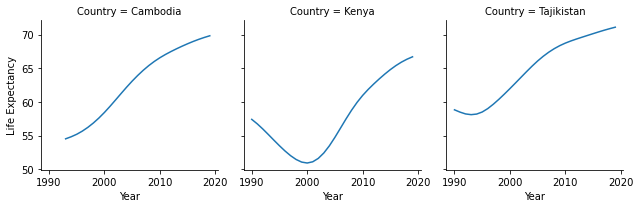

In [334]:
#Subset gdp_le to only ag_heavy countries
Ag_heavy_ss= gdp_le[gdp_le['Country'].isin(Ag_heavy['Country'])]

#Create facetgrid showing Life Expectancy over the years
g = sns.FacetGrid(Ag_heavy_ss, col = 'Country')
g.map(sns.lineplot, 'Year', 'Life Expectancy');

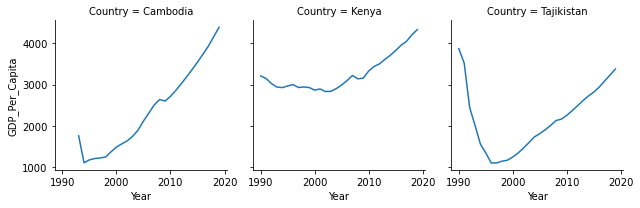

In [335]:
#Create facetgrid showing GDP_Per_Capita over the years
g = sns.FacetGrid(Ag_heavy_ss, col = 'Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita');

In [337]:
#Find the major industry in each country(industry with highest population of the country)
#Find the max of each row
emp_pivoted['MajorInd_N'] = emp_pivoted.loc[:,['Agriculture', 'Arts', 'Construction', 'Education',
                                             'Finance', 'Information', 'Manufacturing', 'Mining',
                                             'Public Admin', 'Real Estate', 'Service',
                                             'Social Work', 'Trade', 'Transportation'] ].aggregate(func = np.max, axis=1)

#Find the column name corresponding to the max
emp_pivoted['MajorInd'] = emp_pivoted.loc[:,'Agriculture':'Transportation'].isin(emp_pivoted['MajorInd_N']).idxmax(1)

In [338]:
emp_pivoted.head(2)

Industry,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,Real Estate,Service,Social Work,Trade,Transportation,Utility Services,Sum,AgPercent,MajorInd_N,MajorInd
Country,,,,,,,,,,,,,,,,,,,,
Albania,706980.0,29428.0,226752.0,203304.0,36864.0,41344.0,238504.0,27188.0,2784020.0,212036.0,1108.0,221352.0,113624.0,351264.0,99196.0,27120.0,5320084.0,13.288888,706980.0,Agriculture
Armenia,1560992.0,56780.0,272192.0,378968.0,59320.0,74208.0,316012.0,36056.0,4316448.0,324724.0,11740.0,177848.0,169316.0,409336.0,148568.0,83184.0,8395692.0,18.592774,1560992.0,Agriculture


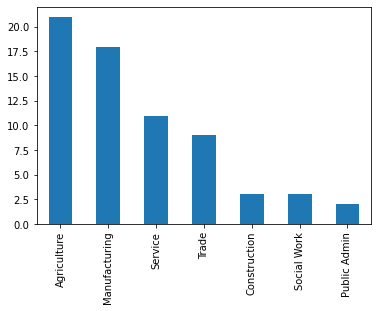

In [340]:
#Bar chart comparing major industries by count
emp_pivoted['MajorInd'].value_counts().plot(kind = 'bar');

Agriculture is the most common major industry (has the most countries with Agriculture as their major industry). 

In [345]:
#Countries with Public Administration as the most common industry
public_ad = emp_pivoted[emp_pivoted['MajorInd']=='Public Admin']
public_ad

Industry,Agriculture,Arts,Construction,Education,Finance,Information,Manufacturing,Mining,Other,Public Admin,...,Service,Social Work,Trade,Transportation,Utility Services,Sum,AgPercent,MajorInd_N,MajorInd,MajorInd_Percent
Country,,,,,,,,,,,,,,,,,,,,,
Mayotte,2590.538054,970.624077,1.429774e+04,3.289182e+04,1083.352306,1202.683612,5462.319888,238.608091,1.667756e+05,4.085022e+04,...,1.414611e+04,15883.109258,1.760205e+04,8313.117046,1154.462685,3.243620e+05,0.798656,4.085022e+04,Public Admin,12.594020
Saudi Arabia,786218.000000,28706.000000,3.298228e+06,2.055394e+06,267900.000000,460852.000000,950572.000000,278822.000000,1.990618e+07,3.368808e+06,...,3.252826e+06,914486.000000,2.398294e+06,616768.000000,230878.000000,3.896892e+07,2.017552,3.368808e+06,Public Admin,8.644859


In [347]:
#I don't know how useful or meaningful this is. 
#Calculate the percentage of the population in each major industry
emp_pivoted['MajorInd_Percent'] = 100*emp_pivoted['MajorInd_N']/emp_pivoted['Sum']

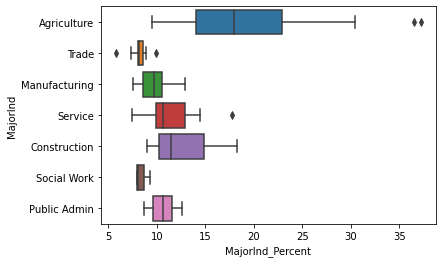

In [349]:
sns.boxplot(data=emp_pivoted, x='MajorInd_Percent', y = 'MajorInd');

The boxplot shows the percentage of population in agriculture has large variability compared to other industries. 

In [352]:
#Create new dataframe only for countries and their population percentage working in Agriculture. 
emp_agr = emp_pivoted.loc[:, ['AgPercent']]

#Merge with gdp_le by Country
gdp_le_agr = pd.merge(gdp_le, emp_agr, on = 'Country')

gdp_le_agr.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life Expectancy,AgPercent
0,Albania,2019,13724.058790,Europe,78.573,13.288888
1,Albania,2018,13366.303065,Europe,78.458,13.288888


In [357]:
#Find correlation between % of population in Agriculture and GDP_Per_Capita
gdp_le_agr['AgPercent'].corr(gdp_le_agr['GDP_Per_Capita'])

-0.7148194734873763

There is a strong negative relationship between % of population in agriculture and GDP per capita. 

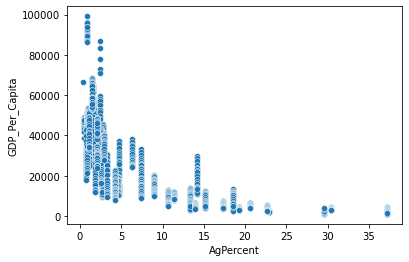

In [355]:
#Draw scatterplot of AgPercent and GDP per capita.
sns.scatterplot(data = gdp_le_agr, x = 'AgPercent', y = 'GDP_Per_Capita');

In [356]:
gdp_le_agr['logGDP'] = np.log10(gdp_le_agr['GDP_Per_Capita'])

In [359]:
#Find correlation between % of population in Agriculture and logGDP_Per_Capita
gdp_le_agr['AgPercent'].corr(gdp_le_agr['logGDP'])

-0.8961244045419884

There is a stroger negative correlation between the percentage of the population in agriculture and logGDP.

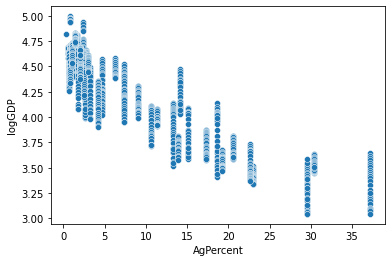

In [360]:
#Draw scatterplot of AgPercent and log GDP per capita.
sns.scatterplot(data = gdp_le_agr, x = 'AgPercent', y = 'logGDP');


In [361]:
#Correlation between population % in agriculture and life expectancy
gdp_le_agr['AgPercent'].corr(gdp_le_agr['Life Expectancy'])

-0.7857116581660123

There is a negative linear association between the population % in agriculture and life expectancy

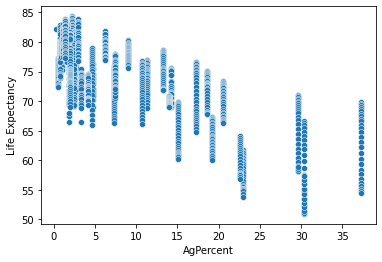

In [362]:
#Scatterdiagram of population % in agriculture and life expectancy
sns.scatterplot(data = gdp_le_agr, x = 'AgPercent', y = 'Life Expectancy');